In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_excel('Data_train.xlsx')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [6]:
df.shape

(6019, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


There are 3 numeric type independent variables:
- Year
- Kilometers_Driven
- Seats
<br>
There are 8 object type independent variables. 
There are 3 ordinal type independent variables:
- year
- seats
- owner_type


In [5]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [7]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Null values are present only in columns 
- Mileage
- Engine
- Power 
- Seats

In [9]:
df['Location'].unique().tolist()

['Mumbai',
 'Pune',
 'Chennai',
 'Coimbatore',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Ahmedabad']

In [10]:
df['Fuel_Type'].unique().tolist()

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

In [11]:
df['Transmission'].unique().tolist()

['Manual', 'Automatic']

In [13]:
df['Owner_Type'].unique().tolist()

['First', 'Second', 'Fourth & Above', 'Third']

In [14]:
df['Seats'].unique().tolist()

[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, nan, 10.0, 9.0, 0.0]

#### Columns like Mileage, Engine and Power are numeric data but are of object data type due to the units being mentioned along with them.The removal of units is necessary to perform numeric functions on them.

In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [16]:
#y=lambda x:x[-3:]

In [33]:
df['Engine']=df['Engine'].map(lambda x: x.rstrip(' CC'))

AttributeError: 'float' object has no attribute 'rstrip'

In [26]:
df[df.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [32]:
df[(df.Engine.isnull()==True)&(df.Power.isnull()==True)&(df.Seats.isnull()==True)].shape

(36, 12)

Thus for every row where we have null value for Engine capacity, we also have null value for Power and number of Seats

In [34]:
df[(df.Engine.isnull()!=True)&(df.Power.isnull()!=True)&(df.Seats.isnull()==True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75


In [ ]:
#We can see that there are null values present in the Power column that are not being considered as null values

### Outliers

#### Kilometers_Driven

In [12]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
print("Range of distance is from {} to {}, value is {}".format(df['Kilometers_Driven'].min(),df['Kilometers_Driven'].max(),df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min())/10)
print("The median value of the score is ", np.median(df['Kilometers_Driven']))

Range of distance is from 171 to 6500000, value is 6499829
Bin is 10, so each bar corresponds to the value of: 649982.9
The median value of the score is  53000.0


In [11]:
#Standardisation of values
from sklearn.preprocessing import StandardScaler

In [18]:
scaling=StandardScaler()
df.Kilometers_Driven=scaling.fit_transform(df[['Kilometers_Driven']])

In [19]:
df.Kilometers_Driven.describe()

count    6.019000e+03
mean    -1.045388e-17
std      1.000083e+00
min     -6.417551e-01
25%     -2.710721e-01
50%     -6.287860e-02
75%      1.562724e-01
max      7.058046e+01
Name: Kilometers_Driven, dtype: float64

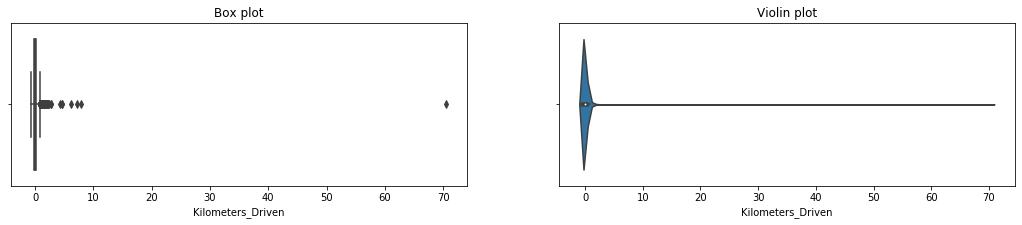

In [20]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Kilometers_Driven'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(df['Kilometers_Driven'])
plt.title('Violin plot')
plt.show()

In [21]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.139581,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.309678,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [22]:
print("Range of distance is from {} to {}, value is {}".format(df['Kilometers_Driven'].min(),df['Kilometers_Driven'].max(),df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min())/10)
print("The median value of the score is ", np.median(df['Kilometers_Driven']))

Range of distance is from -0.6417551056083325 to 70.58045810025035, value is 71.22221320585868
Bin is 10, so each bar corresponds to the value of: 7.122221320585868
The median value of the score is  -0.06287859955681817


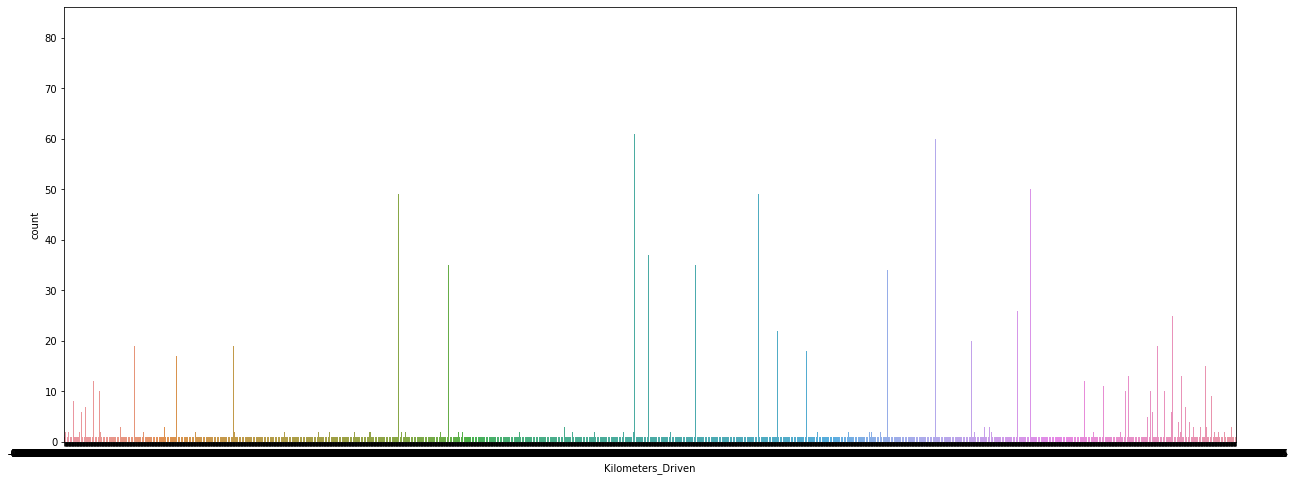

In [25]:
plt.figure(figsize=(21,8))
sns.countplot(df['Kilometers_Driven'])
plt.show()

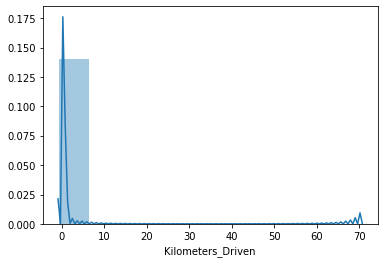

In [26]:
sns.distplot(df['Kilometers_Driven'], bins=10, kde=True )

Most of the values lie between -0.6 to about 8. the values near 70 can be considered as outliers.

In [27]:
print("Range of distance is from {} to {}, value is {}".format(df['Year'].min(),df['Year'].max(),df['Year'].max()-df['Year'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Year'].max()-df['Year'].min())/10)
print("The median value of the score is ", np.median(df['Year']))

Range of distance is from 1998 to 2019, value is 21
Bin is 10, so each bar corresponds to the value of: 2.1
The median value of the score is  2014.0


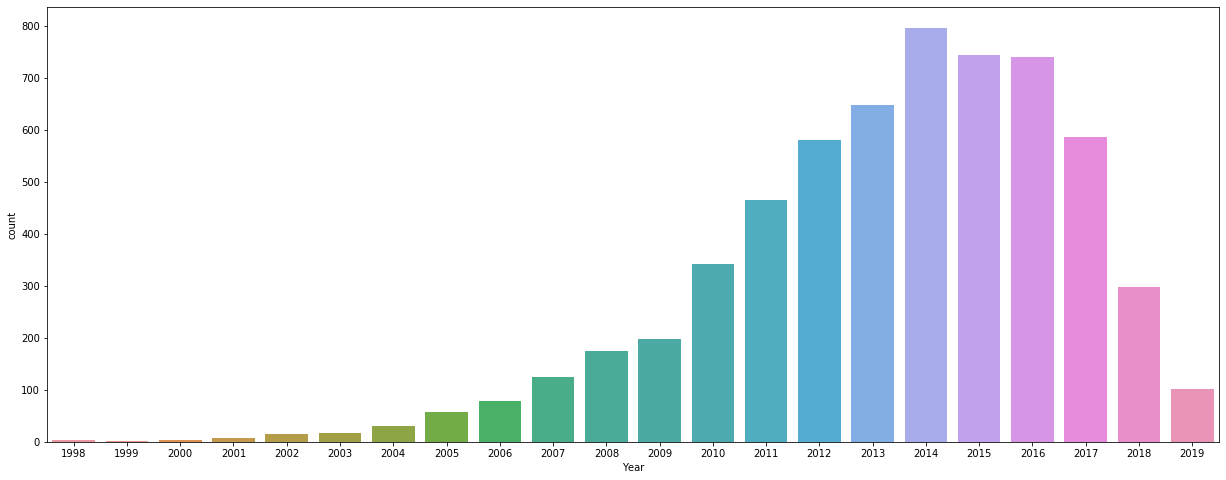

In [28]:
plt.figure(figsize=(21,8))
sns.countplot(df['Year'])
plt.show()

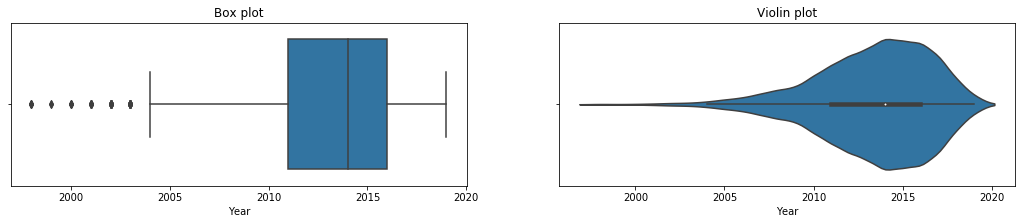

In [29]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Year'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(df['Year'])
plt.title('Violin plot')
plt.show()

In [34]:
print("Range of distance is from {} to {}, value is {}".format(df['Seats'].min(),df['Seats'].max(),df['Seats'].max()-df['Seats'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Seats'].max()-df['Seats'].min())/10)
print("The median value of the score is ", np.median(df['Seats']))

Range of distance is from 0.0 to 10.0, value is 10.0
Bin is 10, so each bar corresponds to the value of: 1.0
The median value of the score is  nan


C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


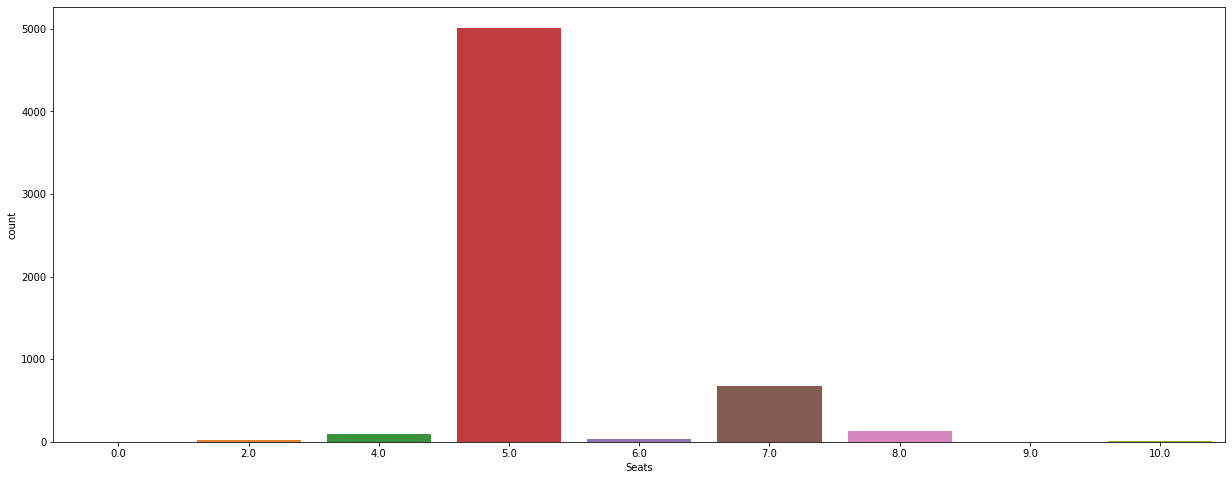

In [36]:
plt.figure(figsize=(21,8))
sns.countplot(df['Seats'])
plt.show()

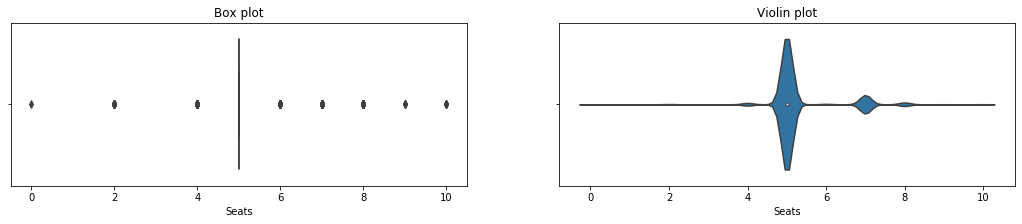

In [38]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Seats'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(df['Seats'])
plt.title('Violin plot')
plt.show()

Maximum number of cars, about 5000 of them, are 5 seated vehicles